<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning/blob/main/Gradient_Boosting_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [63]:
df=pd.DataFrame([

            [6.82, 118, 0],
                      [6.36, 125, 1],
                      [5.39, 99, 1],
                      [5.50, 106, 1],
                      [6.39, 148, 0],
                      [9.13, 148, 1],
                      [7.17, 147, 1],
                      [7.72, 72, 0]

],columns=['cgpa',	'iq',	'is_placed'])

In [64]:
df

,cgpa,iq,is_placed
0,6.82,118,0
1,6.36,125,1
2,5.39,99,1
3,5.50,106,1
4,6.39,148,0
5,9.13,148,1
6,7.17,147,1
7,7.72,72,0


In [65]:
#initail Prediction
df["pre1(log-odd)"]=np.log(5/3)

In [66]:
df

,cgpa,iq,is_placed,pre1(log-odd)
0,6.82,118,0,0.510826
1,6.36,125,1,0.510826
2,5.39,99,1,0.510826
3,5.50,106,1,0.510826
4,6.39,148,0,0.510826
5,9.13,148,1,0.510826
6,7.17,147,1,0.510826
7,7.72,72,0,0.510826


In [67]:
df['pre1(probability)']=1/(1+np.exp(-np.log(5/3)))

In [68]:
df

,cgpa,iq,is_placed,pre1(log-odd),pre1(probability)
0,6.82,118,0,0.510826,0.625
1,6.36,125,1,0.510826,0.625
2,5.39,99,1,0.510826,0.625
3,5.50,106,1,0.510826,0.625
4,6.39,148,0,0.510826,0.625
5,9.13,148,1,0.510826,0.625
6,7.17,147,1,0.510826,0.625
7,7.72,72,0,0.510826,0.625


In [69]:
df['res1']=df['is_placed']-df['pre1(probability)']

In [70]:
df

,cgpa,iq,is_placed,pre1(log-odd),pre1(probability),res1
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.625,-0.625
5,9.13,148,1,0.510826,0.625,0.375
6,7.17,147,1,0.510826,0.625,0.375
7,7.72,72,0,0.510826,0.625,-0.625


In [71]:
tree1=DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

In [72]:
tree1.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)


DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

[Text(0.4, 0.8333333333333334, 'node #0\nid <= 6.375\nsquared_error = 0.234\nsamples = 8\nvalue = 0.0'),
 Text(0.2, 0.5, 'node #1\nsquared_error = 0.0\nsamples = 3\nvalue = 0.375'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'node #2\ncgpa <= 132.5\nsquared_error = 0.24\nsamples = 5\nvalue = -0.225'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'node #3\nsquared_error = 0.0\nsamples = 2\nvalue = -0.625'),
 Text(0.8, 0.16666666666666666, 'node #4\nsquared_error = 0.222\nsamples = 3\nvalue = 0.042')]

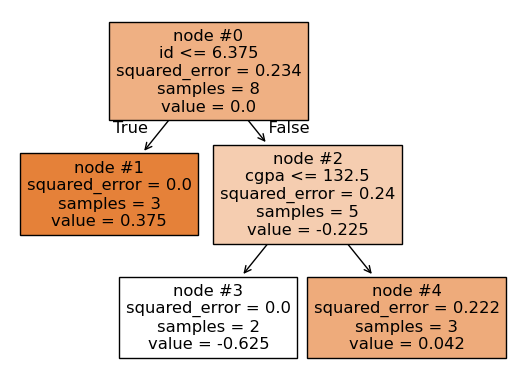

In [73]:
plot_tree(tree1, feature_names=['id','cgpa'], filled=True, node_ids=True)

In [74]:
df['leaf_entry1']= tree1.apply(df.iloc[:,0:2])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [75]:
df

,cgpa,iq,is_placed,pre1(log-odd),pre1(probability),res1,leaf_entry1
0,6.82,118,0,0.510826,0.625,-0.625,3
1,6.36,125,1,0.510826,0.625,0.375,1
2,5.39,99,1,0.510826,0.625,0.375,1
3,5.50,106,1,0.510826,0.625,0.375,1
4,6.39,148,0,0.510826,0.625,-0.625,4
5,9.13,148,1,0.510826,0.625,0.375,4
6,7.17,147,1,0.510826,0.625,0.375,4
7,7.72,72,0,0.510826,0.625,-0.625,3


In [83]:
def return_logs(leaf):
  temp_df=df[df['leaf_entry1']==leaf]
  num= temp_df['res1'].sum()

  der=sum(temp_df['pre1(probability)']*(1-temp_df['pre1(probability)']))
  return round(num/der, 2)

In [84]:
return_logs(4)

np.float64(0.18)

In [86]:
df['pre2(log-odds)']=df['pre1(log-odd)']+df['leaf_entry1'].apply(return_logs)

In [87]:
df

,cgpa,iq,is_placed,pre1(log-odd),pre1(probability),res1,leaf_entry1,pre2(log-odds)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174


In [89]:
df['pre2(probability)'] = 1/(1+np.exp(-df['pre2(log-odds)']))
df

,cgpa,iq,is_placed,pre1(log-odd),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477


In [90]:
df['res2'] = df['is_placed'] - df['pre2(probability)']
df

,cgpa,iq,is_placed,pre1(log-odd),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477


In [91]:
reg2 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg2.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

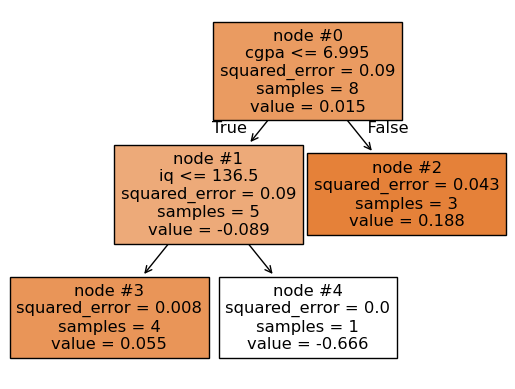

In [92]:
plot_tree(reg2, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()

In [93]:
df['leaf_entry2'] = reg2.apply(df.iloc[:,0:2])
df

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,pre1(log-odd),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2


In [94]:
def return_logs(leaf):
  num = df[df['leaf_entry2'] == leaf]['res2'].sum()
  den = sum(df[df['leaf_entry2'] == leaf]['pre2(probability)'] * (1 - df[df['leaf_entry2'] == leaf]['pre2(probability)']))
  return round(num/den,2)

In [96]:
df['pre3(log-odds)'] = df['pre1(log-odd)'] + df['pre2(log-odds)'] + df['leaf_entry2'].apply(return_logs)

In [97]:
df['pre3(probability)'] = 1/(1+np.exp(-df['pre3(log-odds)']))
df

,cgpa,iq,is_placed,pre1(log-odd),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2,pre3(log-odds),pre3(probability)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-1.068349,0.255717
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4,-1.798349,0.142052
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2,-0.598349,0.354722


In [98]:
df['res_final'] = df['is_placed'] - df['pre3(probability)']

df[['res1','res2','res_final']]

,res1,res2,res_final
0,-0.625,-0.103477,-0.255717
1,0.375,0.108049,0.039104
2,0.375,0.108049,0.039104
3,0.375,0.108049,0.039104
4,-0.625,-0.666151,-0.142052
5,0.375,0.333849,0.095207
6,0.375,0.333849,0.095207
7,-0.625,-0.103477,-0.354722
